In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow.keras.backend as K


In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [ ]:
dirtrain='/content/drive/MyDrive/data set/New folder (12)/Original Data/train'

In [ ]:
dirtest='/content/drive/MyDrive/data set/New folder (12)/Original Data/test'

In [ ]:
categories=["Black Rot","Healthy","Leaf Blight"]

(256, 256, 3)


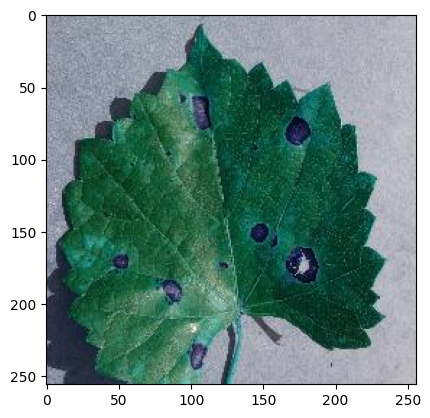

In [ ]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [13]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [14]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [15]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

5302
[1888, 1692, 1722]
1326
[473, 423, 430]


In [16]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [17]:
x_train = []
y_train = []
x_test = []
y_test = []

In [18]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

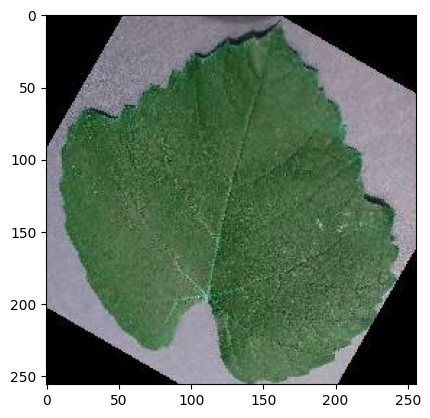

In [19]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [20]:
import cv2
import numpy as np

x_test = []
y_test = []

for features, label in testing_data:
    # Check if the image data is valid before resizing
    if features is not None and features.size != 0:
        # Resize only if the image is valid
        resized_features = cv2.resize(features, (256, 256))
        x_test.append(resized_features)
        y_test.append(label)
    else:
        # Handle invalid image data (e.g., print a warning or skip)
        print("Warning: Encountered an invalid image. Skipping...")

# Convert the list to a NumPy array after resizing valid images
x_test = np.array(x_test).reshape(-1, 256, 256, 3)

In [21]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [22]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [23]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [24]:
x_train.shape

(5302, 256, 256, 3)

In [25]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,652 (404.89 KB)

 Trainable params: 103,652 (404.89 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
y_train_cat=to_categorical(y_train,4)


In [28]:
y_test_cat=to_categorical(y_test,4)

In [29]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 837s 6s/step - accuracy: 0.5834 - loss: 5.3521 - val_accuracy: 0.9410 - val_loss: 0.1674
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 858s 6s/step - accuracy: 0.9252 - loss: 0.2277 - val_accuracy: 0.9573 - val_loss: 0.1270
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 827s 6s/step - accuracy: 0.9471 - loss: 0.1468 - val_accuracy: 0.9799 - val_loss: 0.0637
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 863s 6s/step - accuracy: 0.9718 - loss: 0.0795 - val_accuracy: 0.9837 - val_loss: 0.0498
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 879s 6s/step - accuracy: 0.9719 - loss: 0.0964 - val_accuracy: 0.9874 - val_loss: 0.0381
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 859s 6s/step - accuracy: 0.9739 - loss: 0.0850 - val_accuracy: 0.9912 - val_loss: 0.0355
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 837s 6s/step - accuracy: 0.9791 - loss: 0.0661 - val_accuracy: 0.9899 - val_loss: 0.0304
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 861s 6s/step - accuracy: 0.9832 - loss: 0.0547 - val_accu

In [30]:
model.save("leaf_disease_coloured.h5")

In [31]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")


In [32]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

42/42 - 62s - 1s/step - accuracy: 0.9683 - loss: 0.0774
Restored model, accuracy: 96.83%


In [35]:
'''from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

'from tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())'

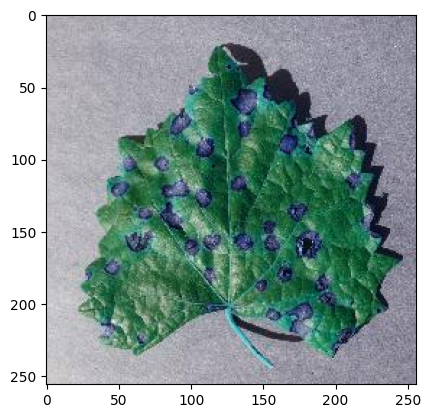

In [36]:
d='/content/drive/MyDrive/data set/New folder (12)/Original Data/train/Black Rot/29a79416-7d6b-45b9-b48e-c40ca10bde21___FAM_B.Rot 0617_flipLR.JPG'
img=cv2.imread(d)
plt.imshow(img)

In [37]:
img=img.reshape(-1,256,256,3)

In [39]:
import numpy as np

# Assuming new_model is your trained Keras model and img is your input image
predictions = new_model.predict(img)  # Get the model's predictions

# Get the class with the highest probability
predict_class = np.argmax(predictions, axis=-1)

# Print the predicted class
print(predict_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[0]


In [40]:
predict_class


array([0])

In [41]:
categories[predict_class[0]]

'Black Rot'